##Importing the Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importing the Dataset

In [38]:
dataset = pd.read_csv('diabetes_data_upload.csv')
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


##Seperation of Dependent and Independent Variables

In [39]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [40]:
print(X)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

In [41]:
print(y)

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object


##Data Preprocessing

In [42]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X.iloc[:, 1:] = encoder.fit_transform(X.iloc[:, 1:])

In [ ]:
print(X)

In [47]:
y = y.reshape(len(y), 1)
y = encoder.fit_transform(y)

In [ ]:
print(y)

##Splitting Data into Training and Test Sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Building the Multiple Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Predicting Results and Evaluating Model Performance

In [59]:
y_pred = regressor.predict(X_test)

In [73]:
print(y_pred)

[[ 0.62303161]
 [ 0.5985242 ]
 [ 1.21208522]
 [ 0.1866693 ]
 [ 0.24745188]
 [ 0.7878994 ]
 [ 0.83060419]
 [ 0.77335803]
 [ 0.50374548]
 [ 1.29367375]
 [ 0.59366656]
 [ 0.00670526]
 [ 0.78603819]
 [ 0.81615889]
 [ 0.71072164]
 [ 1.20426231]
 [ 0.36728421]
 [ 1.03495606]
 [ 0.75928665]
 [ 1.20426231]
 [ 0.83233178]
 [ 0.49549214]
 [ 0.93832292]
 [ 0.21773406]
 [-0.02801529]
 [ 0.16813107]
 [ 0.43446918]
 [ 0.92905159]
 [ 0.5155318 ]
 [ 0.86044739]
 [ 0.99657674]
 [ 0.23320809]
 [ 0.51119641]
 [ 0.81615889]
 [ 0.97973603]
 [ 0.74748397]
 [ 0.90936216]
 [ 0.1591499 ]
 [ 1.21208522]
 [ 0.86214323]
 [ 0.78402188]
 [-0.00938443]
 [ 1.0776903 ]
 [ 0.40443267]
 [-0.02801529]
 [ 1.20426231]
 [ 1.22679393]
 [ 0.18104033]
 [ 1.22679393]
 [ 0.22026668]
 [ 0.91958718]
 [ 0.16813107]
 [ 0.96035403]
 [ 0.22236861]
 [ 1.22679393]
 [ 0.29413739]
 [ 1.14701276]
 [ 0.7861306 ]
 [ 1.08892019]
 [ 1.20426231]
 [ 0.3849266 ]
 [ 0.06398029]
 [ 1.29367375]
 [ 0.43242129]
 [ 0.66783097]
 [ 0.39858625]
 [ 0.82666

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7049121809809052

##Determining Percentage Acuracy on Test Results

In [72]:
def accuracy(x_test, y_test, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if np.round(y_pred[i]) == y_test[i]:
            correct += 1
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

accuracy_score = accuracy(X_test, y_test, y_pred)
print(f"Accuracy: {accuracy_score}%")



Accuracy: 93.26923076923077%


##Visualising the results

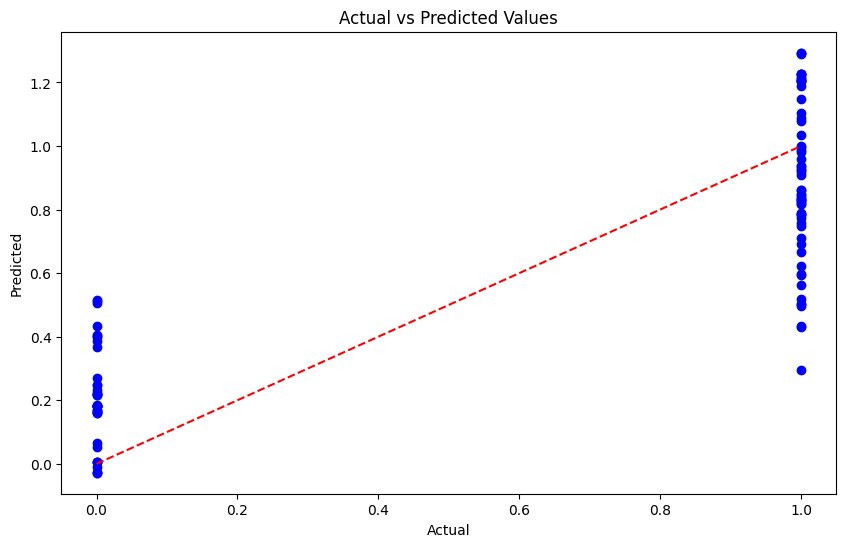

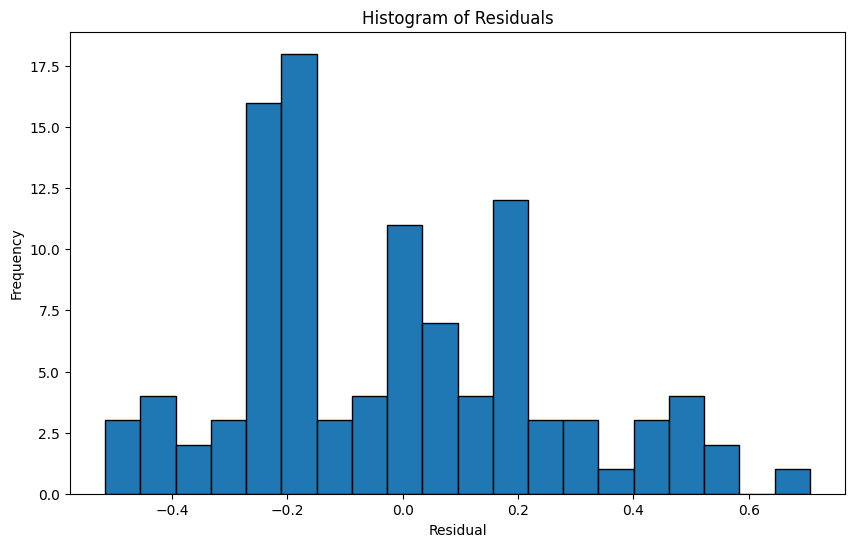

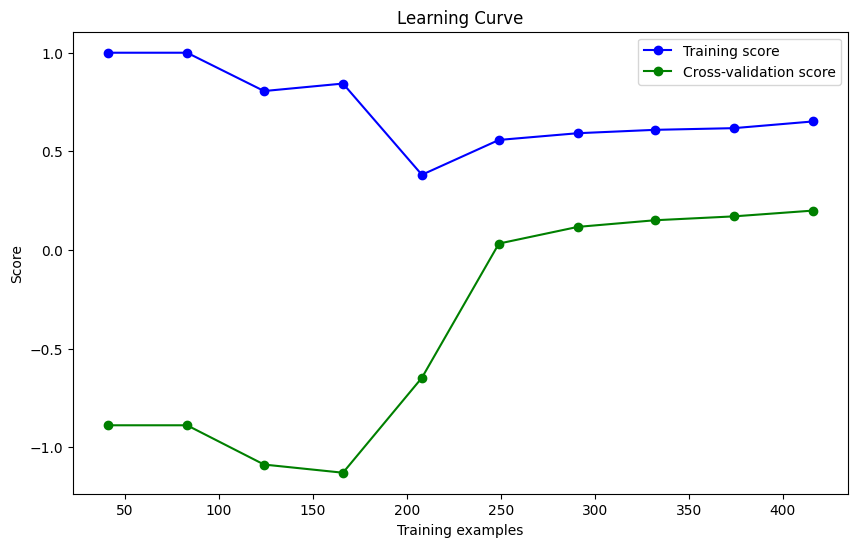

In [78]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='r2',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()
